In [3]:
import cv2 # opencv 3.4.2+ required
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.1/38.6 MB 901.1 kB/s eta 0:00:43
   ---------------------------------------- 0.2/38.6 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.3/38.6 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.4/38.6 MB 1.6 MB/s eta 0:00:24
    --------------------------------------- 0.6/38.6 MB 1.7 MB/s eta 0:00:22
    --------------------------------------- 0.7/38.6 MB 1.9 MB/s eta 0:00:20
    --------------------------------------- 0.8/38.6 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.9/38.6 MB 2.0 MB/s eta 0:00:19
   - -------------------------------------- 1.0/38.6 MB 2.0 MB/s eta 0:00:19
   - -------------------------------------- 1.1/38.6 MB 2.1 MB/s eta 0:00:19
   -

In [4]:
print(cv2.__version__)

4.9.0


In [9]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import cv2
proto = './Dataset/colorization_deploy_v2.prototxt.txt'
weights = './Dataset/colorization_release_v2_norebal.caffemodel'
# colorization_release_v2_norebal.caffemodel is trained with a classification loss with no class re-balancing term.
# The results are duller but "safer" colorizations
# weights = './models/colorization_release_v2_norebal.caffemodel' 

# load cluster centers
pts_in_hull = np.load('./Dataset/pts_in_hull.npy')
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1).astype(np.float32)

# load model
net = cv2.dnn.readNetFromCaffe(proto, weights)
# net.getLayerNames()

# populate cluster centers as 1x1 convolution kernel
net.getLayer(net.getLayerId('class8_ab')).blobs = [pts_in_hull]
# scale layer doesn't look work in OpenCV dnn module, we need to fill 2.606 to conv8_313_rh layer manually
net.getLayer(net.getLayerId('conv8_313_rh')).blobs = [np.full((1, 313), 2.606, np.float32)]

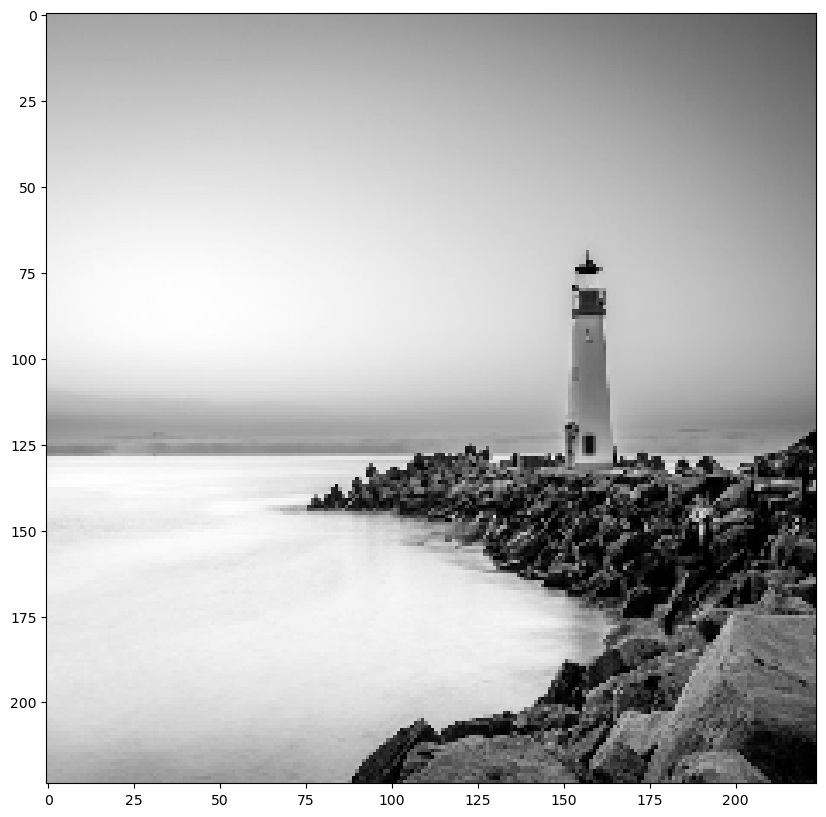

In [28]:
img_path = './Dataset/sample_17.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_input = img.copy()

# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

img_rgb = img.copy()

# normalize input
img_rgb = (img_rgb / 255.).astype(np.float32)

# convert RGB to LAB
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
# only L channel to be used
img_l = img_lab[:, :, 0]

input_img = cv2.resize(img_l, (224, 224))
input_img -= 50 # subtract 50 for mean-centering

# plot images
# fig = plt.figure(figsize=(10, 5))
# fig.add_subplot(1, 2, 1)
# plt.imshow(img_rgb)
# fig.add_subplot(1, 2, 2)
# plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(input_img, cmap='gray')

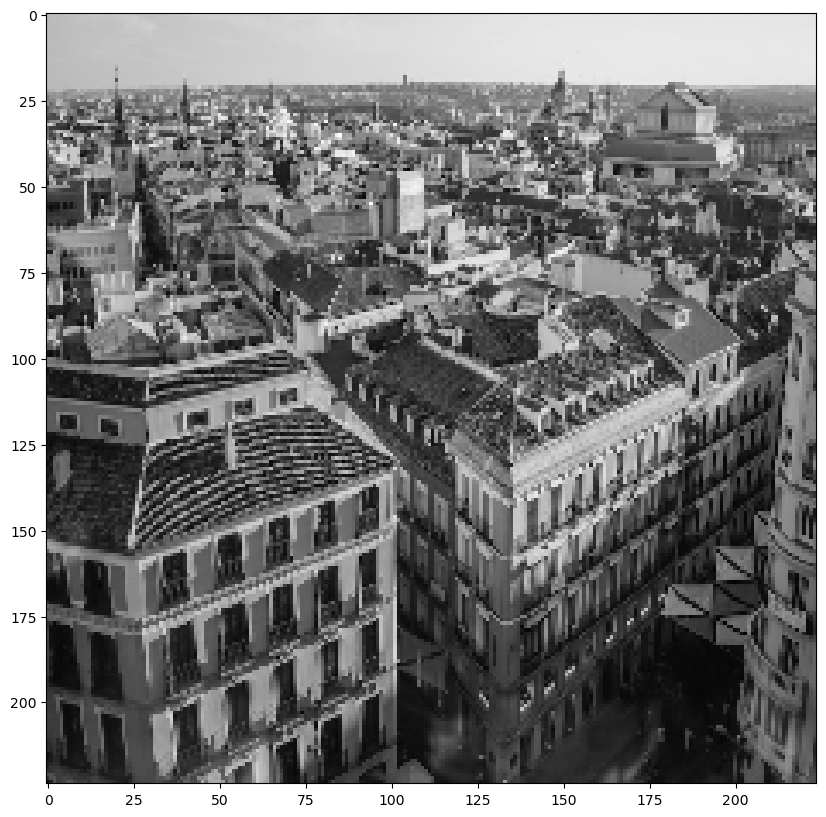

In [20]:
img_path = './Dataset/sample_20.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_input = img.copy()

# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

img_rgb = img.copy()

# normalize input
img_rgb = (img_rgb / 255.).astype(np.float32)

# convert RGB to LAB
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
# only L channel to be used
img_l = img_lab[:, :, 0]

input_img = cv2.resize(img_l, (224, 224))
input_img -= 50 # subtract 50 for mean-centering

# plot images
# fig = plt.figure(figsize=(10, 5))
# fig.add_subplot(1, 2, 1)
# plt.imshow(img_rgb)
# fig.add_subplot(1, 2, 2)
# plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(input_img, cmap='gray')

In [15]:
net.setInput(cv2.dnn.blobFromImage(input_img))
pred = net.forward()[0,:,:,:].transpose((1, 2, 0))

# resize to original image shape
pred_resize = cv2.resize(pred, (img.shape[1], img.shape[0]))

# concatenate with original image L
pred_lab = np.concatenate([img_l[:, :, np.newaxis], pred_resize], axis=2)

# convert LAB to RGB
pred_rgb = cv2.cvtColor(pred_lab, cv2.COLOR_Lab2RGB)
pred_rgb = np.clip(pred_rgb, 0, 1) * 255
pred_rgb = pred_rgb.astype(np.uint8)

# plot prediction result
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 2, 1).axis('off')
plt.imshow(img_l, cmap='gray')
fig.add_subplot(1, 2, 2).axis('off')
plt.imshow(pred_rgb)
# plt.savefig(output_filename)

# save result image file
filename, ext = os.path.splitext(img_path)
# input_filename = '%s_input%s' % (filename, ext)
# output_filename = '%s_output%s' % (filename, ext)

# pred_rgb_output = cv2.cvtColor(pred_rgb, cv2.COLOR_RGB2BGR)

# cv2.imwrite(input_filename, img_input)
# cv2.imwrite(output_filename, np.concatenate([img, pred_rgb_output], axis=1))

NameError: name 'input_img' is not defined

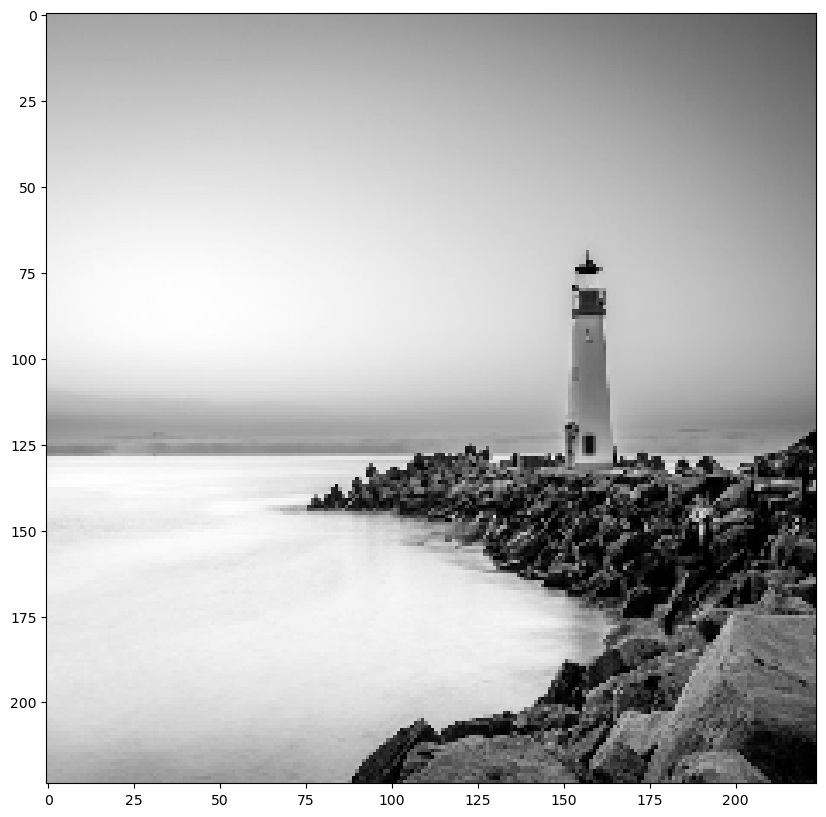

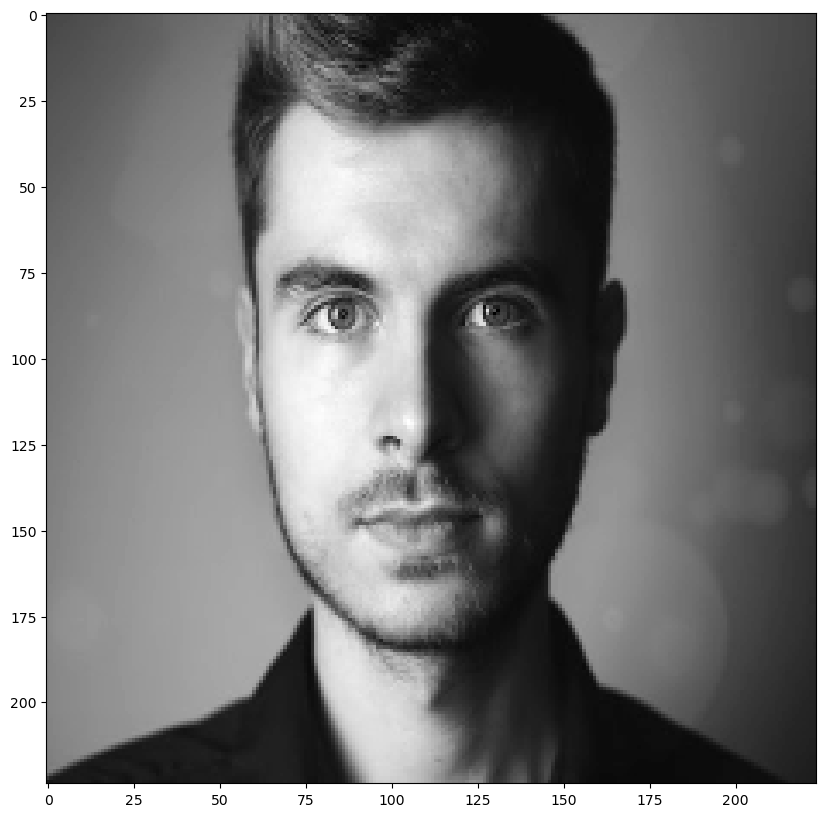

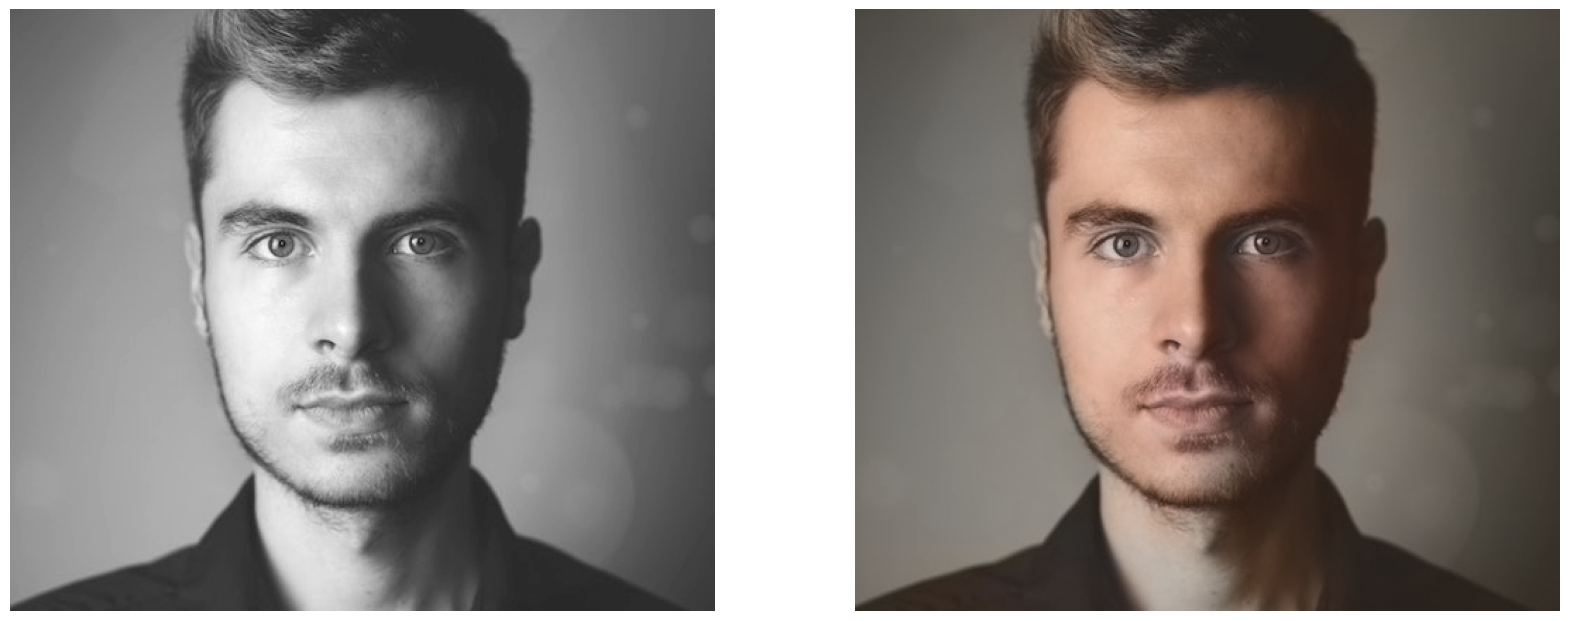

In [30]:
import cv2 # opencv 3.4.2+ required
import os
import numpy as np
import matplotlib.pyplot as plt

proto = './Dataset/colorization_deploy_v2.prototxt.txt'
weights = './Dataset/colorization_release_v2_norebal.caffemodel'
# colorization_release_v2_norebal.caffemodel is trained with a classification loss with no class re-balancing term.
# The results are duller but "safer" colorizations
# weights = './models/colorization_release_v2_norebal.caffemodel' 

# load cluster centers
pts_in_hull = np.load('./Dataset/pts_in_hull.npy')
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1).astype(np.float32)

# load model
net = cv2.dnn.readNetFromCaffe(proto, weights)
# net.getLayerNames()

# populate cluster centers as 1x1 convolution kernel
net.getLayer(net.getLayerId('class8_ab')).blobs = [pts_in_hull]
# scale layer doesn't look work in OpenCV dnn module, we need to fill 2.606 to conv8_313_rh layer manually
net.getLayer(net.getLayerId('conv8_313_rh')).blobs = [np.full((1, 313), 2.606, np.float32)]






img_path = './Dataset/sample_17.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_input = img.copy()

# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

img_rgb = img.copy()

# normalize input
img_rgb = (img_rgb / 255.).astype(np.float32)

# convert RGB to LAB
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
# only L channel to be used
img_l = img_lab[:, :, 0]

input_img = cv2.resize(img_l, (224, 224))
input_img -= 50 # subtract 50 for mean-centering

# plot images
# fig = plt.figure(figsize=(10, 5))
# fig.add_subplot(1, 2, 1)
# plt.imshow(img_rgb)
# fig.add_subplot(1, 2, 2)
# plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(input_img, cmap='gray')






img_path = './Dataset/sample_0.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_input = img.copy()

# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

img_rgb = img.copy()

# normalize input
img_rgb = (img_rgb / 255.).astype(np.float32)

# convert RGB to LAB
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
# only L channel to be used
img_l = img_lab[:, :, 0]

input_img = cv2.resize(img_l, (224, 224))
input_img -= 50 # subtract 50 for mean-centering

# plot images
# fig = plt.figure(figsize=(10, 5))
# fig.add_subplot(1, 2, 1)
# plt.imshow(img_rgb)
# fig.add_subplot(1, 2, 2)
# plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(input_img, cmap='gray')





net.setInput(cv2.dnn.blobFromImage(input_img))
pred = net.forward()[0,:,:,:].transpose((1, 2, 0))

# resize to original image shape
pred_resize = cv2.resize(pred, (img.shape[1], img.shape[0]))

# concatenate with original image L
pred_lab = np.concatenate([img_l[:, :, np.newaxis], pred_resize], axis=2)

# convert LAB to RGB
pred_rgb = cv2.cvtColor(pred_lab, cv2.COLOR_Lab2RGB)
pred_rgb = np.clip(pred_rgb, 0, 1) * 255
pred_rgb = pred_rgb.astype(np.uint8)

# plot prediction result
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 2, 1).axis('off')
plt.imshow(img_l, cmap='gray')
fig.add_subplot(1, 2, 2).axis('off')
plt.imshow(pred_rgb)
# plt.savefig(output_filename)

# save result image file
filename, ext = os.path.splitext(img_path)
# input_filename = '%s_input%s' % (filename, ext)
# output_filename = '%s_output%s' % (filename, ext)

# pred_rgb_output = cv2.cvtColor(pred_rgb, cv2.COLOR_RGB2BGR)

# cv2.imwrite(input_filename, img_input)
# cv2.imwrite(output_filename, np.concatenate([img, pred_rgb_output], axis=1))